In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
x = np.load("results/rewards.npz")

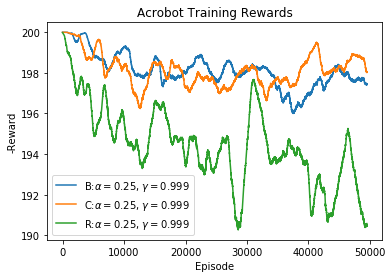

In [12]:

def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
for key in x.keys():
    f = json.loads(key)
    data = -np.mean(x[key], axis=0)
    avg = moving_average(data, 500)
    plt.plot(np.arange(avg.shape[0]), avg, label=f"{f['agent']}:$\\alpha={str(f['alpha'])}$, $\\gamma={str(f['gamma'])}$")
plt.xlabel("Episode")
plt.ylabel("-Reward")
plt.title("Acrobot Training Rewards")
plt.legend()
plt.show()


In [5]:
json.loads(list(x.keys())[0])

{'init_Q': 0,
 'gamma': 0.999,
 'agent': 'B',
 'environment': 'Acrobot-v1',
 'max_steps': 200,
 'alpha': 0.25}

In [8]:
print(data.shape)

(20, 50000)
